In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# 데이터 불러오기
df = pd.read_csv('c:/bank.csv',sep = ',')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# 이상값 탐지
df.isnull().sum()
# 이상값 존재하지 않음

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
# 변수 분류
y = df['deposit'].values
numerical_variables = list(df._get_numeric_data().columns)
categorical_variables = set(df.columns) - set(numerical_variables)

In [9]:
# 범주형변수
categorical_variables

{'contact',
 'default',
 'deposit',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome'}

In [10]:
# 연속형변수
numerical_variables

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [12]:
# 범주형 변수
import matplotlib.pyplot as plt
def bar_plot(variable):
    var =df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

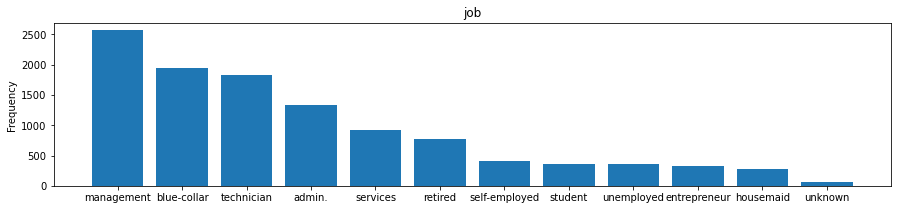

job: 
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


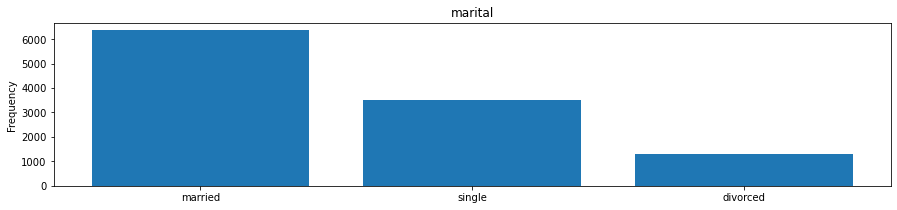

marital: 
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


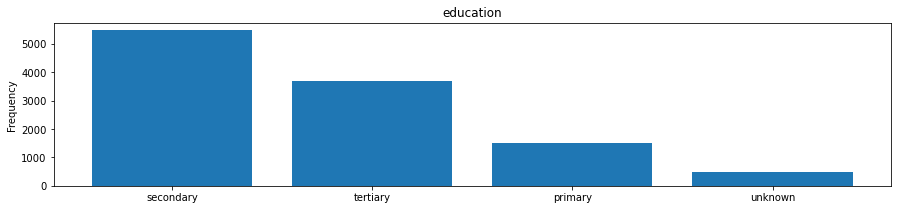

education: 
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


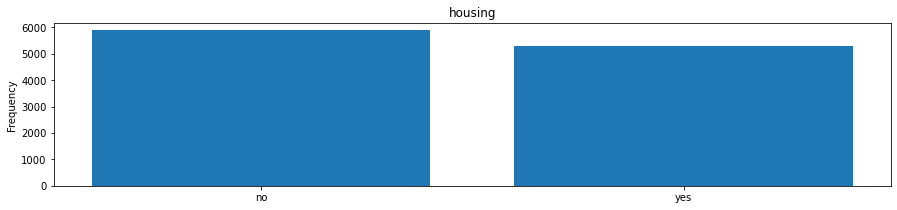

housing: 
 no     5881
yes    5281
Name: housing, dtype: int64


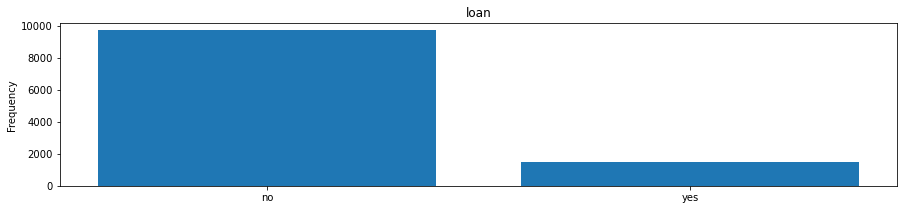

loan: 
 no     9702
yes    1460
Name: loan, dtype: int64


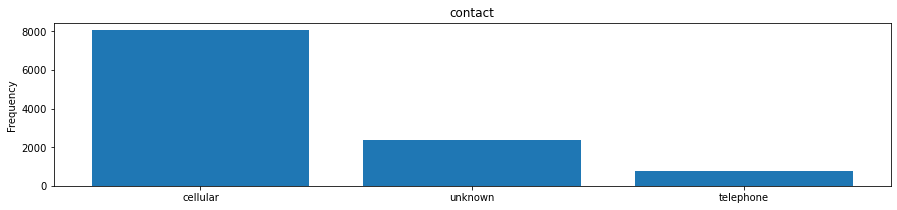

contact: 
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


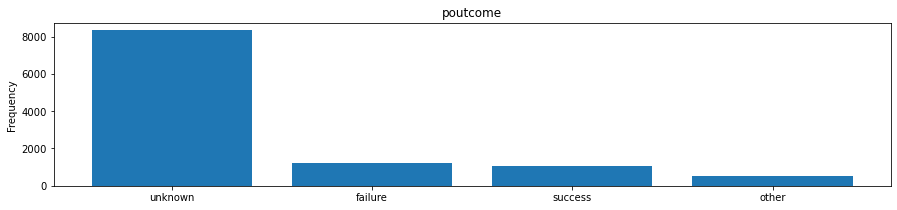

poutcome: 
 unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


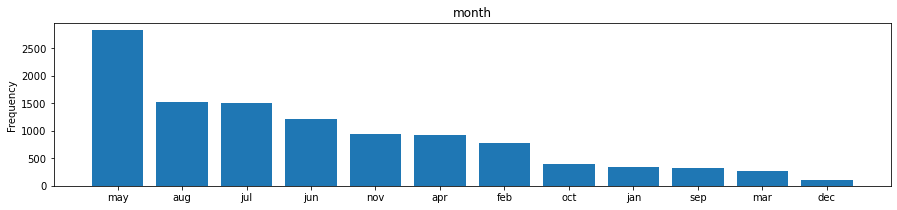

month: 
 may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


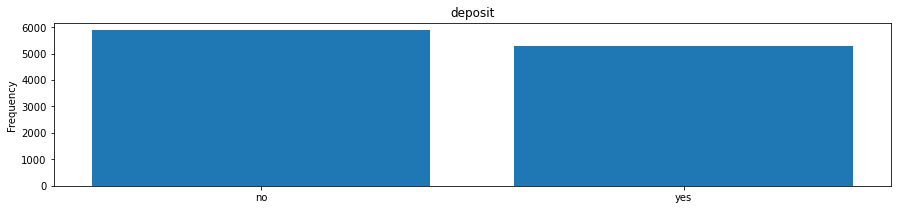

deposit: 
 no     5873
yes    5289
Name: deposit, dtype: int64


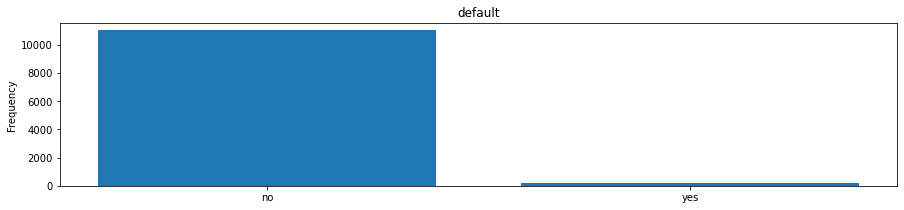

default: 
 no     10994
yes      168
Name: default, dtype: int64


In [13]:
# 열에 들어있는 범주별 빈도수(그래프)
categoryc = ["job","marital","education", "housing", "loan","contact","poutcome","month","deposit","default"]
for c in categoryc:
    bar_plot(c)

In [14]:
# 연속형변수
def plot_hist(variable):
    plt.figure(figsize=(9,6))
    plt.hist(df[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

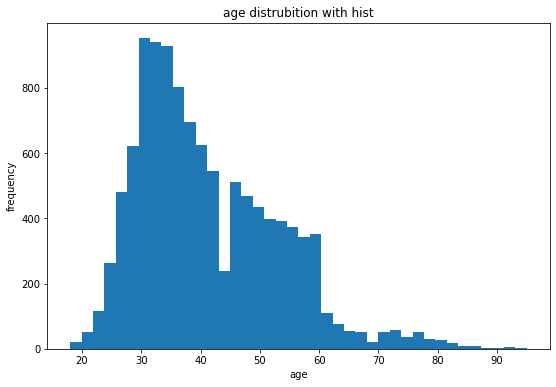

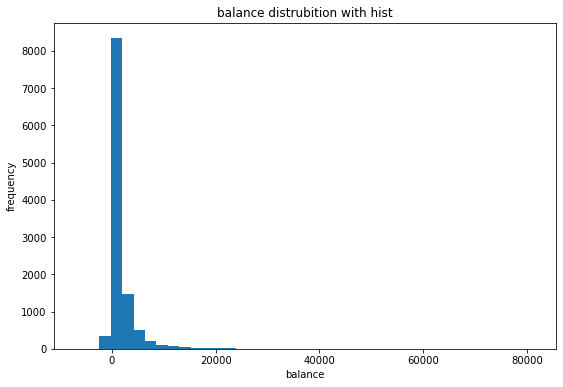

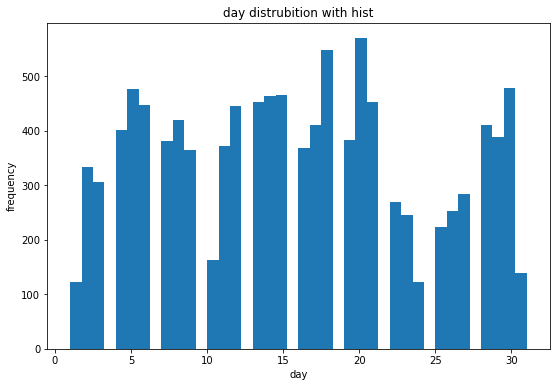

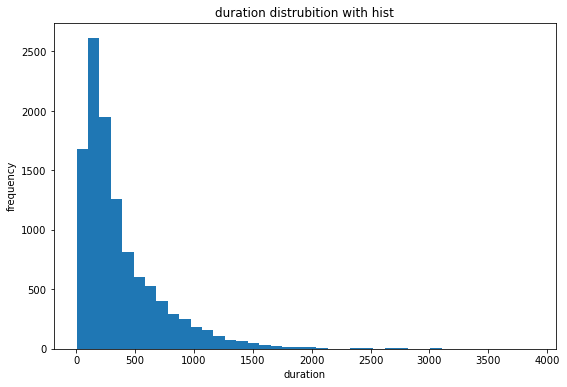

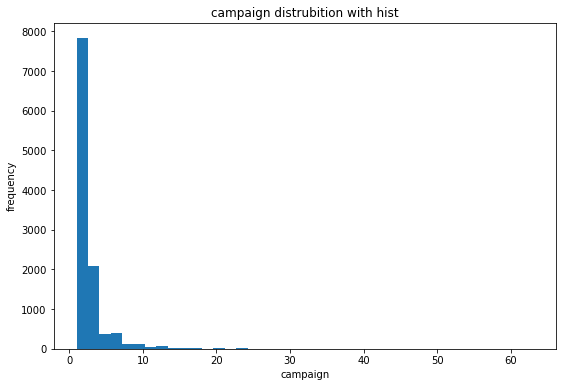

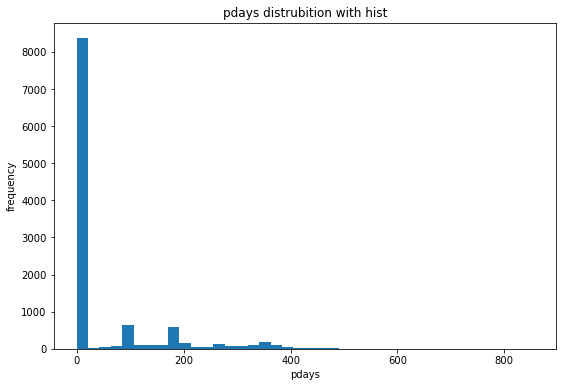

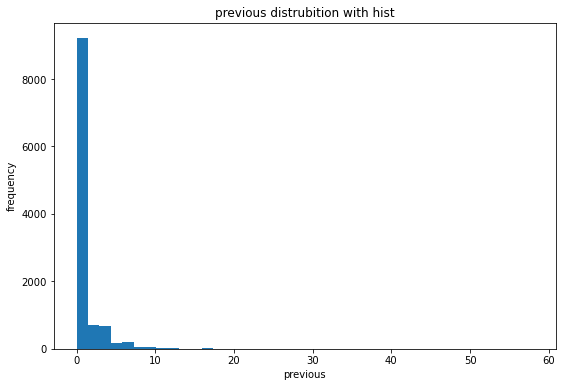

In [15]:
# 열에 들어있는 연속형 범위(그래프)
numericVar = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for n in numericVar:
    plot_hist(n)

<AxesSubplot:>

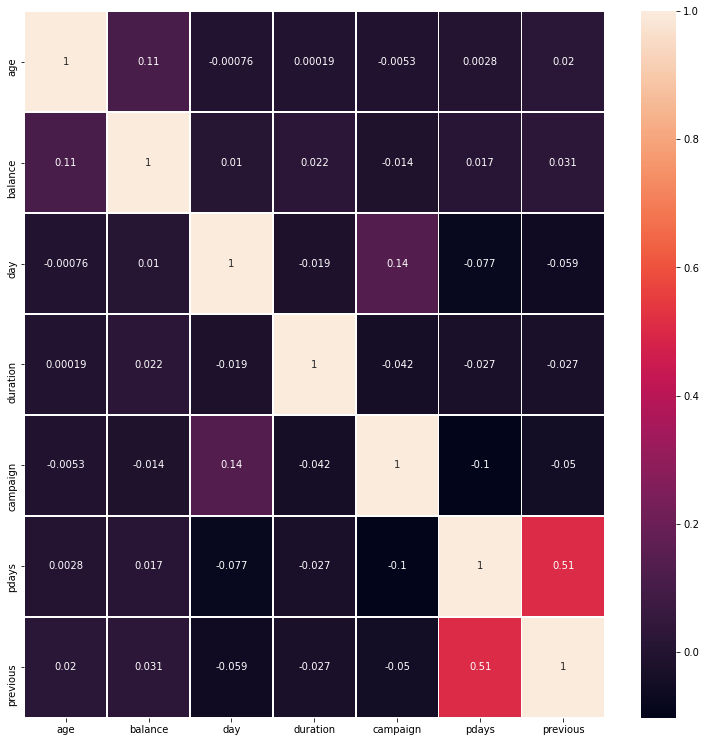

In [16]:
# 연속형 변수의 히트맵(히트맵그래프)
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [17]:
# 원-핫 인코딩 방법 1. 더미변수
columns=df.select_dtypes(include=[object]).columns
data=pd.concat([df,pd.get_dummies(df[columns])],axis=1)
data=df.drop(['job','marital','education','default','housing','loan','contact','month','day','poutcome'],axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       11162 non-null  int64 
 1   balance   11162 non-null  int64 
 2   duration  11162 non-null  int64 
 3   campaign  11162 non-null  int64 
 4   pdays     11162 non-null  int64 
 5   previous  11162 non-null  int64 
 6   deposit   11162 non-null  object
dtypes: int64(6), object(1)
memory usage: 610.5+ KB


,age,balance,duration,campaign,pdays,previous,deposit
0,59,2343,1042,1,-1,0,yes
1,56,45,1467,1,-1,0,yes
2,41,1270,1389,1,-1,0,yes
3,55,2476,579,1,-1,0,yes
4,54,184,673,2,-1,0,yes


In [18]:
data = pd.get_dummies(df)
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'deposit_no', 'deposit_yes'],
      dtype='object')

In [19]:
features = data.loc[:,'age':'poutcome_unknown']

In [20]:
X = features.values
y = data['deposit_yes'].values

In [21]:
X.shape
y.shape
print(X.shape, y.shape)   # 51개의 고차원 데이터로 변환.

(11162, 51) (11162,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
# 로지스틱 회귀분석의 결과 스코어는 0.82이다.

0.8190612683625941

In [23]:
# 연속형 변수 스케일 후 트렌스포머 사용
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [24]:
df.deposit = pd.DataFrame(df.deposit)

ct = ColumnTransformer([('scaling', StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']),
                        ('onehot',OneHotEncoder(sparse=False),['contact', 'default', 'education', 'housing', 'job', 
                                                               'loan', 'marital', 'month', 'poutcome'])])

data_features = df.drop("deposit", axis=1)

data_features[:3]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_features, df.deposit, random_state=0)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(8371, 51)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [35]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0, max_iter=1000)  #max_iter 원하는 만큼 학습
lr.fit(X_train_trans,y_train)
pred = lr.score(X_test_trans, y_test)
print(pred)

0.8244356861340022


In [36]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=50, max_depth=3)  # 랜덤포레스트에 깊이
clf.fit(X_train_trans,y_train)
pred = clf.score(X_test_trans, y_test)
print(pred)

0.7864564672160516


In [37]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 4,algorithm='ball_tree')
knn.fit(X_train_trans, y_train)
prediction=knn.score(X_test_trans, y_test)
print(prediction)

0.7663919742027947


In [38]:
# 신경망
from sklearn.linear_model import Perceptron
pr = Perceptron(alpha=0.07,max_iter=100, random_state=0,penalty='l1')
pr.fit(X_train_trans, y_train)
prediction=pr.score(X_test_trans, y_test)
print(prediction)

0.5385166606950914
